# **Практическое задание #7**

В этом задании вам предстоит собрать данные с сайта **lifehacker.ru** из рубрики Технологии с помощью библиотек **requests** и **BeautifulSoup**.
В частности, нужно собрать заголовки и тексты материалов с первых десяти страниц рубрики.

Примерный пайплайн решения задания аналогичен примеру из itmo_course_python_07_scraping_bs4.ipynb:

1. Определить формат ссылки для пагинации - **1 балл**
2. В разметке страницы найти уникальные классы/идентификаторы блока с названием и содержанием материала- **3 балла**
3. Получить содержимое десяти страниц списка материалов, выделить из него ссылки на каждый материал - **2 балла**
4. Перебрать все полученные ссылки и получить html-код каждого материала - **1 балл**
5. Распарсить полученный текст разметки с помощью BeautifulSoup, вытащив по каждой ссылке заголовок и содержание материала - **2 балл**
6. Создать датайфрейм с полученными данными - **1 балл**

# В **конце** ноутбука будет представлен код в одной ячейки для лучшего представления работы программы.

## Импортирование библиотек

In [12]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
from pprint import pprint

## 1. Определить формат ссылки для пагинации - **1 балл**

Как выглядят страницы:

https://lifehacker.ru/topics/technology/

https://lifehacker.ru/topics/technology/?page=2

https://lifehacker.ru/topics/technology/?page=3

и так далее...

### Из кода страницы

In [ ]:
# <a href="/topics/technology/" aria-current="page" class="lh-the-paginator__cell nuxt-link-exact-active\
#                                                         uxt-link-active lh-the-paginator__cell--active" data-jest="link-1">1</a>
# <a href="/topics/technology/?page=2" class="lh-the-paginator__cell" data-jest="link-2">2</a>
# <a href="/topics/technology/?page=3" class="lh-the-paginator__cell" data-jest="link-3">3</a>
# <a href="/topics/technology/?page=4" class="lh-the-paginator__cell" data-jest="link-4">4</a>
# <a href="/topics/technology/?page=5" class="lh-the-paginator__cell" data-jest="link-5">5</a>
# <div data-jest="ellipsis" class="lh-the-paginator__ellipsis">...</div>
# <a href="/topics/technology/?page=924" class="lh-the-paginator__cell" data-jest="link-924">924</a>

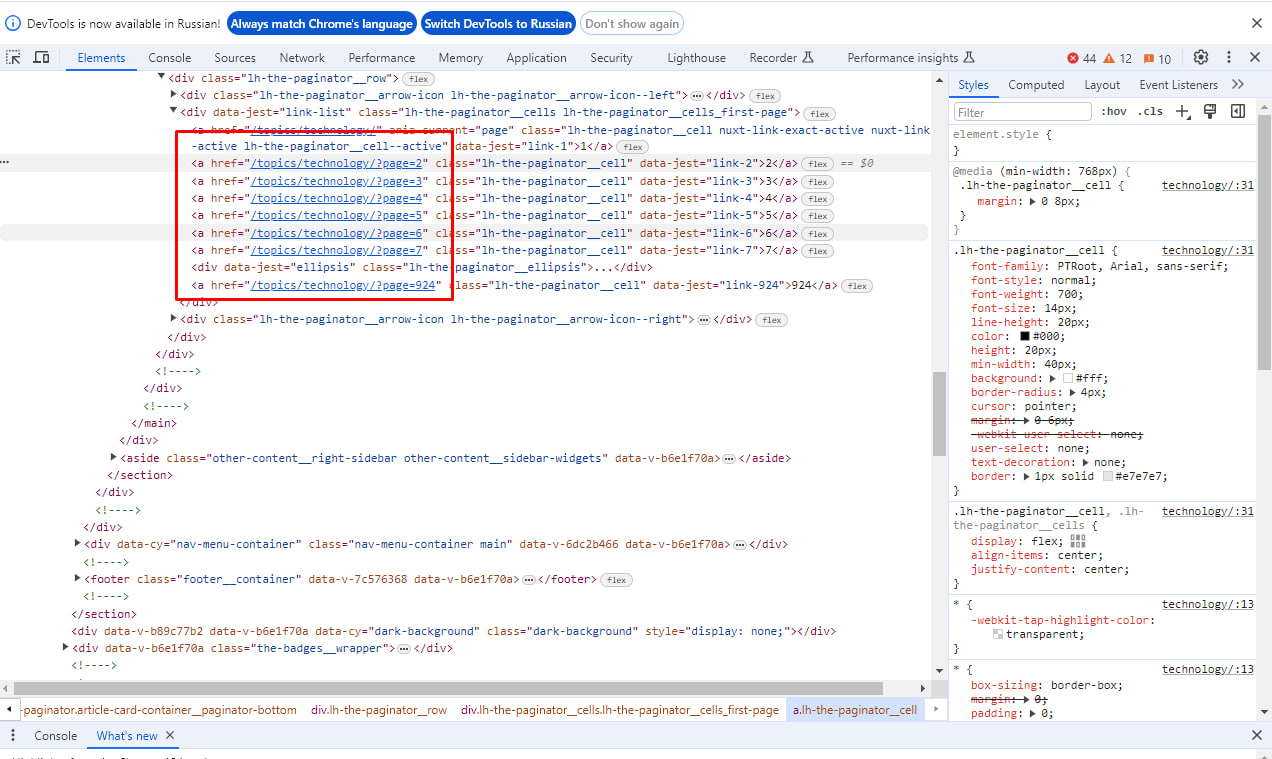

In [13]:
# Определяем формат ссылки для пагинации
base_url = 'https://lifehacker.ru/topics/technology/'
pagination_url = '/topics/technology/?page={}'

In [14]:
# Функция для получения содержимого страницы
def get_page_content(url):
  response = requests.get(url)
  return BeautifulSoup(response.text, 'lxml')

# 2. В разметке страницы найти уникальные классы/идентификаторы блока с названием и содержанием материала- **3 балла**

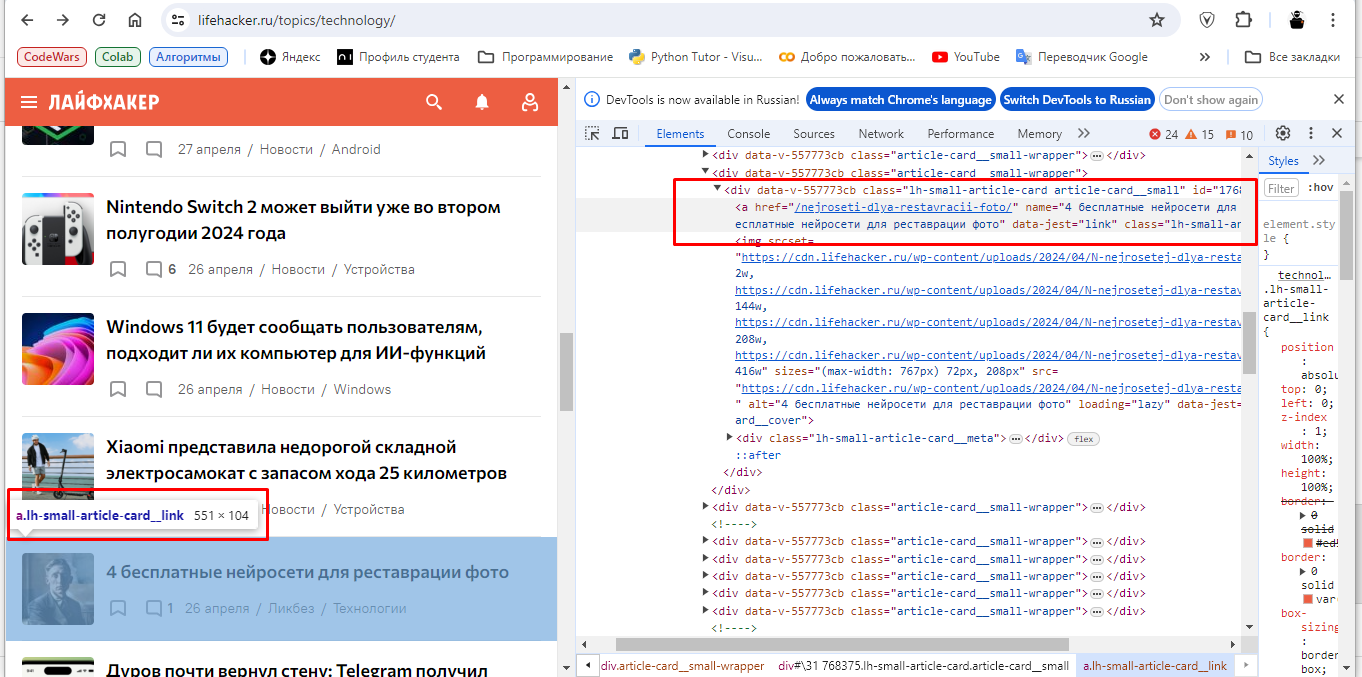

### Из кода страницы **class="lh-small-article-card__link"**

In [ ]:
# <a href="/nejroseti-dlya-restavracii-foto/" name="4 бесплатные нейросети для реставрации фото"
# aria-label="4 бесплатные нейросети для реставрации фото" data-jest="link" class="lh-small-article-card__link"></a>

Как видно из кода страницы уникальный класс/идентификатор блока страницы - **"lh-small-article-card__link"**

In [15]:
# Функция для получения ссылок на статьи со страницы
def get_article_links(soup):
  articles = soup.find_all('a', class_='lh-small-article-card__link')
  return [article['href'] for article in articles]

# 3. Получить содержимое десяти страниц списка материалов, выделить из него ссылки на каждый материал - **2 балла**

In [16]:
# Список для хранения данных статей
articles_data = []

In [17]:
# Перебор страниц
for page in range(1, 11):
  url = base_url if page == 1 else f"{base_url}?page={page}"                      #  Пример https://lifehacker.ru/topics/technology/?page=2
  soup = get_page_content(url)                                                    #  Получения содержимого страницы
  article_links = get_article_links(soup)                                         #  Получения ссылок на статьи со страницы
  print('Количество ссылок на каждой странице: ', len(article_links))
  articles_data.extend(article_links)                                              # Добавляем в список ссылки с каждой страницы

print('Количество ссылок на каждый материал с 10 страниц: ', len(articles_data))

Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждой странице:  30
Количество ссылок на каждый материал с 10 страниц:  300


In [ ]:
# Пример ссылок
pprint(articles_data[:10])

['/kak-vybrat-toster/?erid=25H8d7vbP8SRTvJ4Q27doN',
 '/apple-razreshit-storonnie-magaziny-prilozhenij-na-ipad/',
 '/boston-dynamics-robosobaka-sparkles/',
 '/podrobnosti-o-glavnyx-izmeneniyax-ios-18/',
 '/aksessuary-dlya-nintendo-switch/?erid=Kra2449mN',
 '/youtube-otmenyaet-redizajn/',
 '/televizory-120-gerc/?erid=25H8d7vbP8SRTvJ4Q27doN',
 '/obzor-tecno-pova-6-pro/',
 '/umnye-chasy-samsung-galaxy-watch-7-smogut-opredelyat-uroven-saxara-v-krovi/',
 '/apple-id-sbrasyvaet-parol/']


# 4. Перебрать все полученные ссылки и получить html-код каждого материала - **1 балл**

In [28]:
# Список для хранения данных статей
articles_all_soup = []

In [29]:
 # Перебор ссылок на статьи
for link in tqdm(articles_data):
  full_url = f"https://lifehacker.ru{link}"
  soup = get_page_content(full_url)                 # Получения содержимого страницы
  articles_all_soup.append(soup)                    # Добавление в список

print('Количество html-код каждого материала: ', len(articles_all_soup))

100%|██████████| 300/300 [06:43<00:00,  1.35s/it]

Количество html-код каждого материала:  300


In [30]:
articles_all_soup[0]

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ru-RU%22%7D%7D" data-n-head-ssr="" lang="ru-RU">
<head>
<title>Как выбрать тостер: советы и модели, которые стоит купить - Лайфхакер</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="telephone=no,date=no,address=no,email=no,url=no" data-n-head="ssr" name="format-detection"/><meta content="Лайфхакер" data-hid="al:ios:app_name" data-n-head="ssr" name="al:ios:app_name"/><meta content="app-id=943373933" data-n-head="ssr" name="apple-itunes-app"/><meta content="943373933" data-hid="al:ios:app_store_id" data-n-head="ssr" name="al:ios:app_store_id"/><meta content="//www.facebook.com/lifehacker.ru" data-hid="og:publisher" data-n-head="ssr" property="og:publisher"/><meta content="Лайфхакер" data-hid="og:site_name" data-n-head="ssr" property="og:site_name"/><meta content="website" data-hid="og:type" data-n-head="ssr" property="og:typ

# 5. Распарсить полученный текст разметки с помощью BeautifulSoup, вытащив по каждой ссылке заголовок и содержание материала - **2 балл**

In [31]:
# Функция для получения заголовка и содержимого статьи
def get_article_data(url):
  soup = get_page_content(url)
  title = soup.find('h1').get_text() if soup.find('h1') else ""
  content = soup.find('div', class_='single-article__post-content').get_text() if soup.find('div', class_='single-article__post-content') else ""
  return title, content

In [32]:
# Список для хранения данных статей
articles_data_all = []

# Перебор страниц
for page in range(1, 11):
  url = base_url if page == 1 else f"{base_url}?page={page}"
  soup = get_page_content(url)
  article_links = get_article_links(soup)

  # Перебор ссылок на статьи
  for link in article_links:
    full_url = f"https://lifehacker.ru{link}"
    title, content = get_article_data(full_url)
    articles_data_all.append({'title': title, 'content': content, 'url': full_url})

In [33]:
articles_data_all[0]

{'title': 'Xiaomi выпустила недорогой пауэрбанк на 20 000 мА·ч со встроенным кабелем',
 'content': 'Xiaomi представила новый внешний аккумулятор ёмкостью 20 000 мА·ч. От большинства аналогов он отличается встроенным кабелем питания и по-настоящему доступным ценником в 159 юаней (≈2 100 рублей).Изображение: XiaomiКабель питания с разъёмом USB-C вставляется в специальное отверстие сбоку на корпусе, что позволяет использовать его как петлю для переноски.С учётом этого кабеля и наличия двух дополнительных портов, USB-C и USB-A, пауэрбанк позволяет заряжать до трёх устройств одновременно. Максимальная мощность на кабель — 33 Вт, а при самозарядке — 30 ВтСила тока регулируется автоматически, поэтому заряжать можно не только смартфоны и планшеты, но и аксессуары: Bluetooth-наушники, фитнес-браслеты, часы.Изображение: XiaomiВ наличии все необходимые технологии защиты, в том числе от короткого замыкания, перегрева и перезаряда. Корпус выполнен из сочетания поликарбоната и прочного ABS-пластика.

# 6. Создать датайфрейм с полученными данными - **1 балл**

In [37]:
# Создание датафрейма из полученных данных
df = pd.DataFrame(articles_data_all)

In [38]:
df

,title,content,url
0,Xiaomi выпустила недорогой пауэрбанк на 20 000...,Xiaomi представила новый внешний аккумулятор ё...,https://lifehacker.ru/xiaomi-pauerbank-so-vstr...
1,"Как выбрать тостер: всё, что нужно знать до по...",Как устроен тостерТостер — несложное электриче...,https://lifehacker.ru/kak-vybrat-toster/?erid=...
2,Apple обязали разрешить сторонние магазины при...,Европейская комиссия обязала Apple в течение ш...,https://lifehacker.ru/apple-razreshit-storonni...
3,Boston Dynamics показала робопса Sparkles — он...,Компания Boston Dynamics показала очередную но...,https://lifehacker.ru/boston-dynamics-robosoba...
4,"Перемещение иконок, ИИ и модульный дизайн: под...",В своём свежем отчёте инсайдер Bloomberg Марк ...,https://lifehacker.ru/podrobnosti-o-glavnyx-iz...
...,...,...,...
295,Первая предварительная версия Android 15 выйде...,Подробностей относительно Android 15 в Сети по...,https://lifehacker.ru/pervaya-versiya-android-...
296,"Nvidia выпустила бесплатный аналог ChatGPT, ра...",Компания Nvidia выпустила собственный аналог ч...,https://lifehacker.ru/nvidia-chat-with-rtx/
297,Обновление Windows 11 24H2 приводит к «зелёным...,"Пользователи жалуются, что они не могут устано...",https://lifehacker.ru/obnovlenie-windows-11-24...
298,Автономность iPhone 15 Pro Max и Galaxy S24 Ul...,"YouTube-блогер PhoneBuff, который регулярно пр...",https://lifehacker.ru/avtonomnost-galaxy-s24-u...


# **Код в одной ячейки для более удобного просмотра**

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Формат ссылки для пагинации
base_url = "https://lifehacker.ru/topics/technology/"

# Функция для получения содержимого страницы
def get_page_content(url):
    response = requests.get(url)
    return BeautifulSoup(response.content, 'html.parser')

# Функция для получения ссылок на статьи со страницы
def get_article_links(soup):
    articles = soup.find_all('a', class_='lh-small-article-card__link')
    return [article['href'] for article in articles]

# Функция для получения заголовка и содержимого статьи
def get_article_data(url):
    soup = get_page_content(url)
    title = soup.find('h1').get_text() if soup.find('h1') else ""
    content = soup.find('div', class_='single-article__post-content').get_text() if soup.find('div', class_='single-article__post-content') else ""
    return title, content

# Список для хранения данных статей
articles_data = []

# Перебор страниц
for page in range(1, 11):
  url = base_url if page == 1 else f"{base_url}?page={page}"
  soup = get_page_content(url)
  article_links = get_article_links(soup)

  # Перебор ссылок на статьи
  for link in article_links:
    full_url = f"https://lifehacker.ru{link}"
    title, content = get_article_data(full_url)
    articles_data.append({'title': title, 'content': content, 'url': full_url})

# Создание датафрейма из полученных данных
df = pd.DataFrame(articles_data)

# Вывод датафрейма
df

,title,content,url
0,Xiaomi выпустила недорогой пауэрбанк на 20 000...,Xiaomi представила новый внешний аккумулятор ё...,https://lifehacker.ru/xiaomi-pauerbank-so-vstr...
1,"Как выбрать тостер: всё, что нужно знать до по...",Как устроен тостерТостер — несложное электриче...,https://lifehacker.ru/kak-vybrat-toster/?erid=...
2,Apple обязали разрешить сторонние магазины при...,Европейская комиссия обязала Apple в течение ш...,https://lifehacker.ru/apple-razreshit-storonni...
3,Boston Dynamics показала робопса Sparkles — он...,Компания Boston Dynamics показала очередную но...,https://lifehacker.ru/boston-dynamics-robosoba...
4,"Перемещение иконок, ИИ и модульный дизайн: под...",В своём свежем отчёте инсайдер Bloomberg Марк ...,https://lifehacker.ru/podrobnosti-o-glavnyx-iz...
...,...,...,...
295,Первая предварительная версия Android 15 выйде...,Подробностей относительно Android 15 в Сети по...,https://lifehacker.ru/pervaya-versiya-android-...
296,"Nvidia выпустила бесплатный аналог ChatGPT, ра...",Компания Nvidia выпустила собственный аналог ч...,https://lifehacker.ru/nvidia-chat-with-rtx/
297,Обновление Windows 11 24H2 приводит к «зелёным...,"Пользователи жалуются, что они не могут устано...",https://lifehacker.ru/obnovlenie-windows-11-24...
298,Автономность iPhone 15 Pro Max и Galaxy S24 Ul...,"YouTube-блогер PhoneBuff, который регулярно пр...",https://lifehacker.ru/avtonomnost-galaxy-s24-u...
